In [29]:
# Clear workspace
%reset

# standard packages
from math import e
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle as pkl
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve, plot_precision_recall_curve
from scipy.stats import sem
import plotly.graph_objects as go
from IPython.display import Image

pd.options.display.max_colwidth = 100

# SGL packages
from group_lasso import LogisticGroupLasso
LogisticGroupLasso.LOG_LOSSES = True

%reload_ext autoreload
%autoreload 2

working_dir = "/Users/jason.wang/Desktop/hif2gene/data/model_outputs/hrd" # replace path


Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [30]:
seed = 360
np.random.seed(seed)
outcome = 'HRD'

## Plot Combined Curves

In [38]:
# Load in files
(pancancer_fpr, pancancer_tpr) = pkl.load(open("{0}/roc_curves/pancancer/{1}.roc.data.pkl".format(working_dir, outcome), "rb"))
(pancancer_recall, pancancer_precision) = pkl.load(open("{0}/pr_curves/pancancer/{1}.prc.data.pkl".format(working_dir, outcome), "rb"))

(brca_fpr, brca_tpr) = pkl.load(open("{0}/roc_curves/brca/{1}.roc.data.pkl".format(working_dir, outcome), "rb"))
(brca_recall, brca_precision) = pkl.load(open("{0}/pr_curves/brca/{1}.prc.data.pkl".format(working_dir, outcome), "rb"))

(luad_fpr, luad_tpr) = pkl.load(open("{0}/roc_curves/luad/{1}.roc.data.pkl".format(working_dir, outcome), "rb"))
(luad_recall, luad_precision) = pkl.load(open("{0}/pr_curves/luad/{1}.prc.data.pkl".format(working_dir, outcome), "rb"))

(lusc_fpr, lusc_tpr) = pkl.load(open("{0}/roc_curves/lusc/{1}.roc.data.pkl".format(working_dir, outcome), "rb"))
(lusc_recall, lusc_precision) = pkl.load(open("{0}/pr_curves/lusc/{1}.prc.data.pkl".format(working_dir, outcome), "rb"))

(stad_fpr, stad_tpr) = pkl.load(open("{0}/roc_curves/stad/{1}.roc.data.pkl".format(working_dir, outcome), "rb"))
(stad_recall, stad_precision) = pkl.load(open("{0}/pr_curves/stad/{1}.prc.data.pkl".format(working_dir, outcome), "rb"))


In [39]:
colors = {
    'BRCA': '#f49ff2', 
    'STAD': '#4a91cd', 
    'LUAD': '#ea4253', 
    'LUSC': '#ec924a', 
    'SKCM': '#7c44cc' 
}

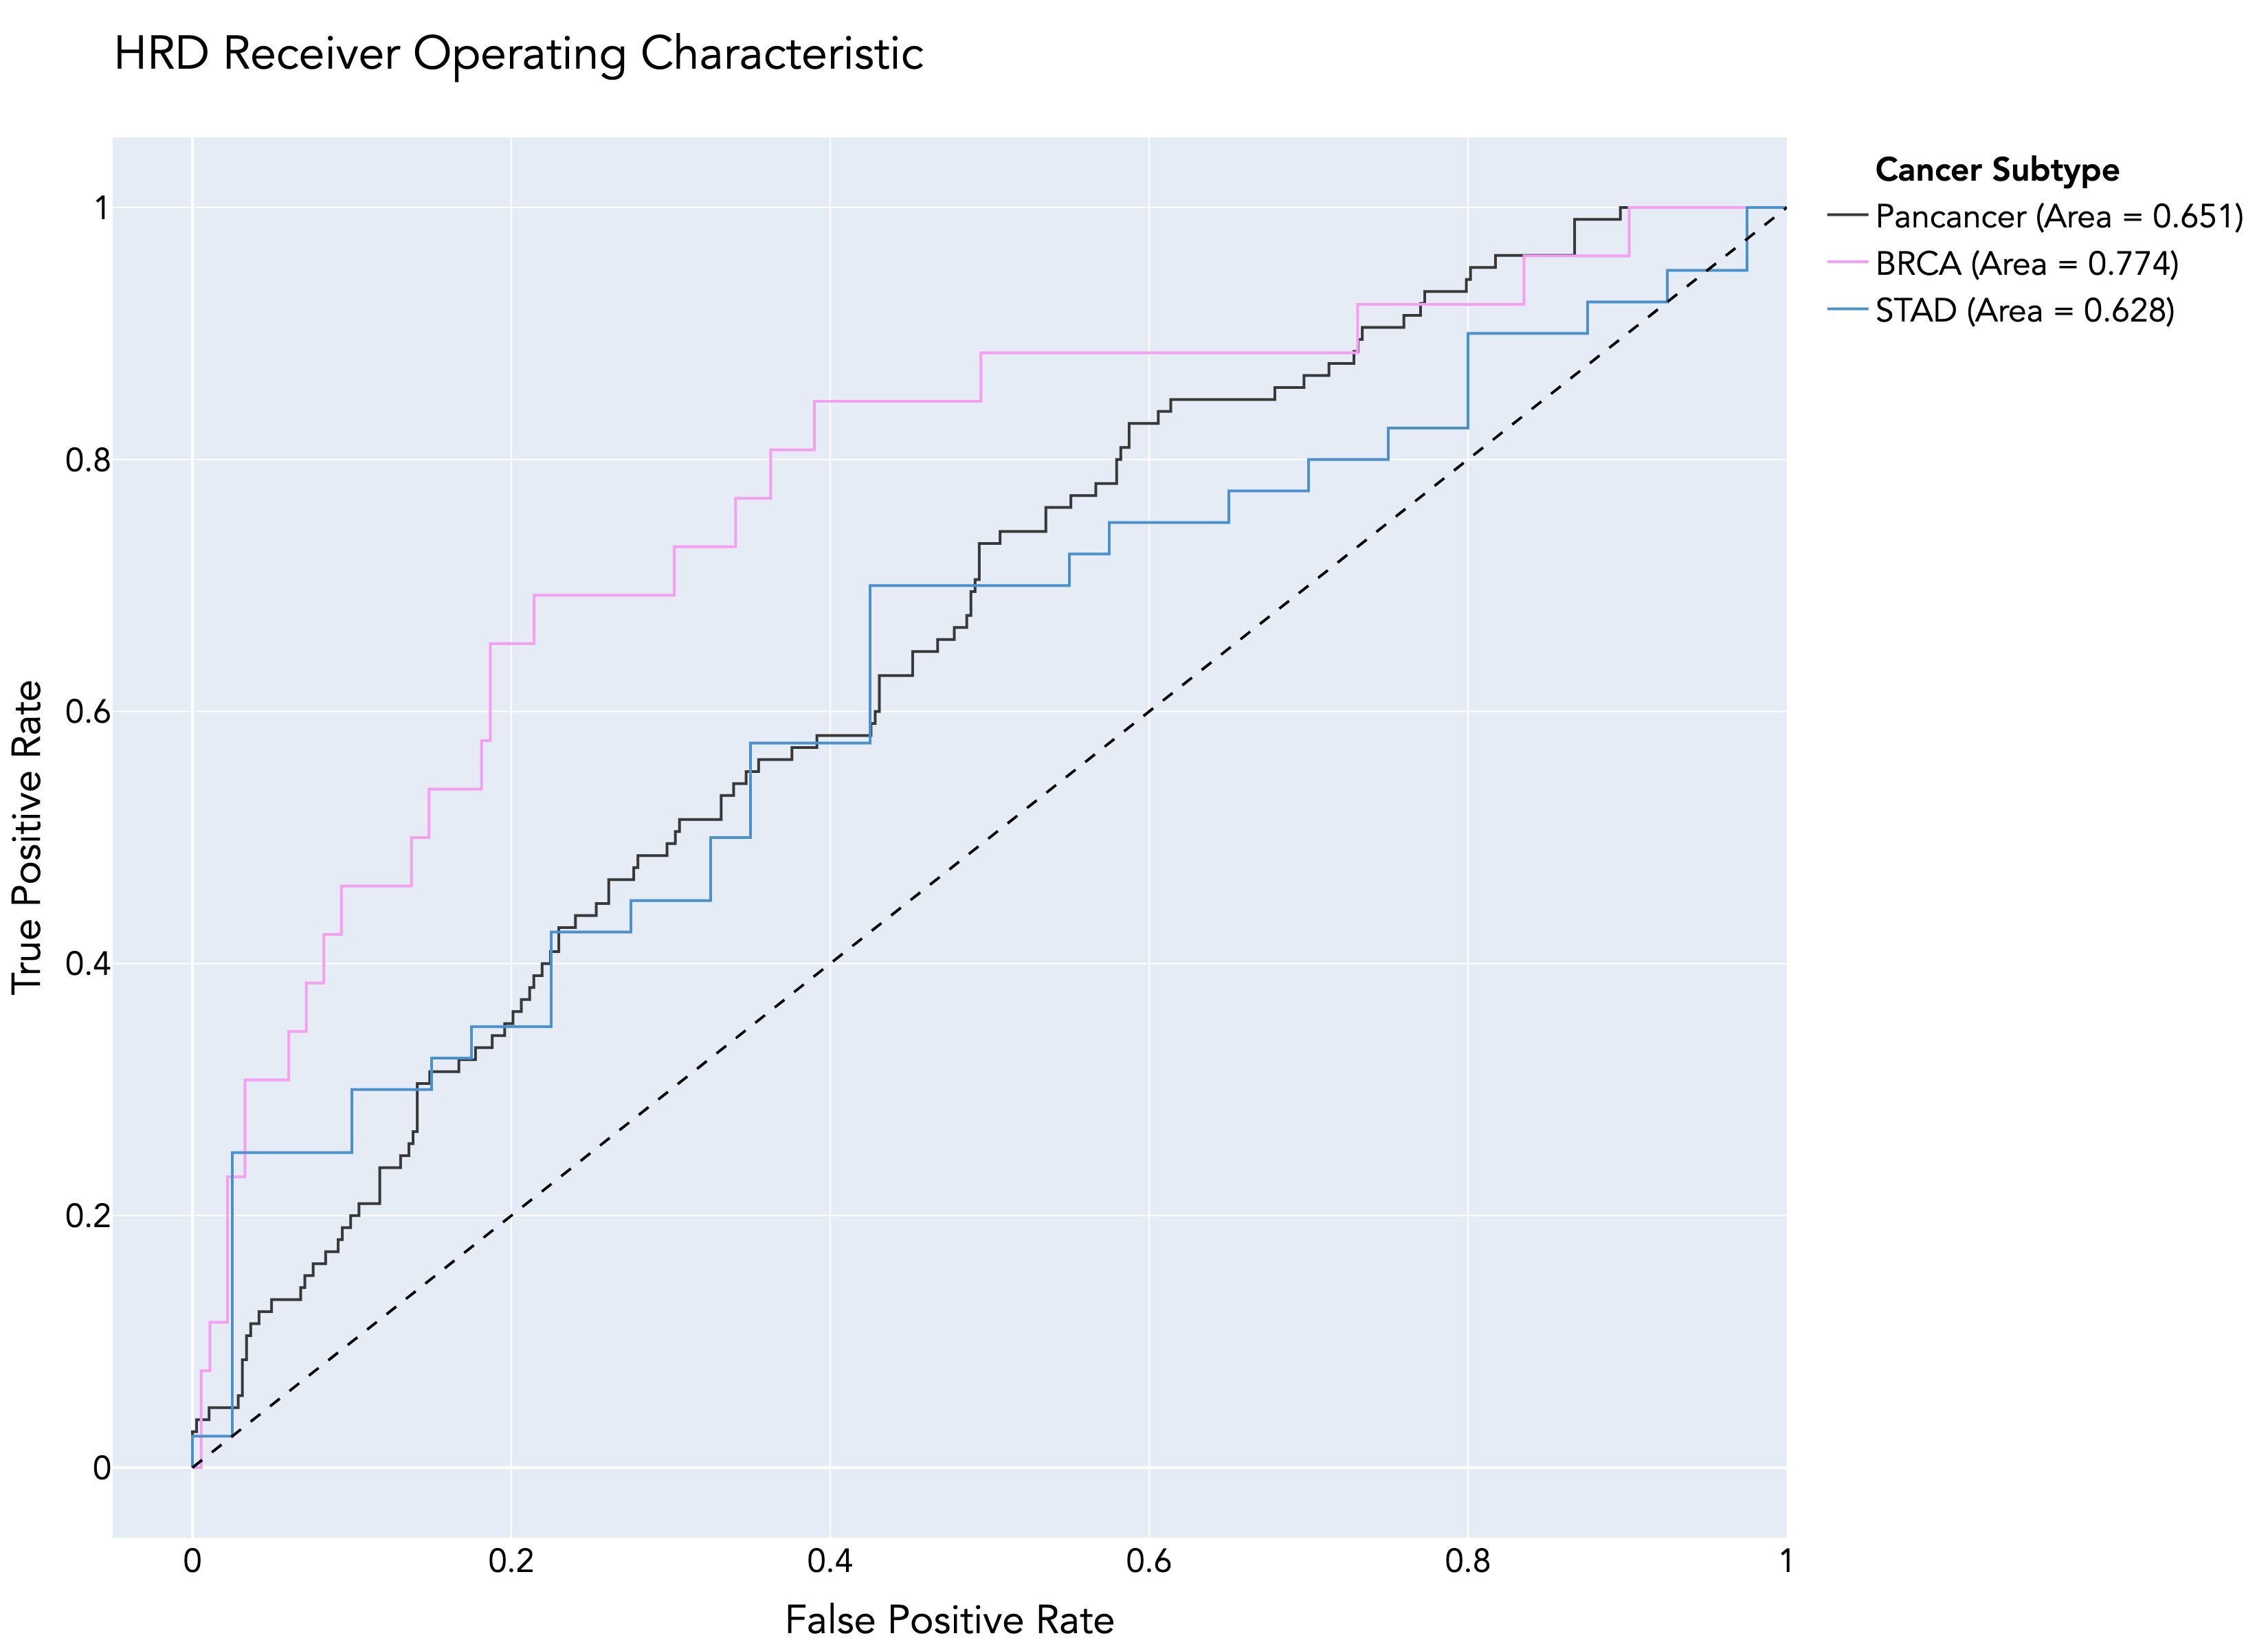

In [40]:
# Plot ROC
dummy_trace = go.Scatter(
    x=[None], y=[None],
    name='<b>Cancer Subtype</b>',
    opacity = 0,
    line={'color': 'rgba(0, 0, 0, 0)'}
)
data = [dummy_trace]

# Pancancer
roc_auc = auc(pancancer_fpr, pancancer_tpr)
trace = go.Scatter(
    x=pancancer_fpr,
    y=pancancer_tpr,
    mode='lines',
    line=dict(color='#393838'),
    opacity=1.0,
    name='Pancancer (Area = %0.3f)' % roc_auc
)
data.append(trace)
    
# BRCA
roc_auc = auc(brca_fpr, brca_tpr)
trace = go.Scatter(
    x=brca_fpr,
    y=brca_tpr,
    mode='lines',
    line=dict(color=colors['BRCA']),
    opacity=1.0,
    name='BRCA (Area = %0.3f)' % roc_auc
)
data.append(trace)  

# LUAD
# roc_auc = auc(luad_fpr, luad_tpr)
# trace = go.Scatter(
#     x=luad_fpr,
#     y=luad_tpr,
#     mode='lines',
#     line=dict(color='#054907'),
#     opacity=1.0,
#     name='LUAD (Area = %0.3f)' % roc_auc
# )
# data.append(trace)

# LUSC
# roc_auc = auc(lusc_fpr, lusc_tpr)
# trace = go.Scatter(
#     x=lusc_fpr,
#     y=lusc_tpr,
#     mode='lines',
#     line=dict(color='#f97306'),
#     opacity=1.0,
#     name='LUSC (Area = %0.3f)' % roc_auc
# )
# data.append(trace)

# STAD
roc_auc = auc(stad_fpr, stad_tpr)
trace = go.Scatter(
    x=stad_fpr,
    y=stad_tpr,
    mode='lines',
    line=dict(color=colors['STAD']),
    opacity=1.0,
    name='STAD (Area = %0.3f)' % roc_auc
)
data.append(trace)

# Plot AUC=0.50 line
trace = go.Scatter(
    x=np.array([0, 1]),
    y=np.array([0, 1]),
    mode='lines',
    line=dict(color='black', dash='dash'),
    opacity=1.0,
    showlegend=False
)
data.append(trace)
    
fig = go.Figure(data=data)

fig.update_layout(
    title='HRD Receiver Operating Characteristic',
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
    font=dict(
        family="Avenir",
        size=24,
        color="black"
    )
)

fig.update_traces(marker_line_width=2, marker_size=12)
fig.update_xaxes(range=[-0.05, 1.0])

img_bytes = fig.to_image(format="png", width=1650, height=1200, scale=2)
Image(img_bytes)

In [41]:
if outcome == 'HRD':
    pct_positive = {
        'BRCA': 0.125,
        'STAD': 0.500,
        'Pancancer': 0.215 
    }
else:
    print("Cancer subtype not recognized...")


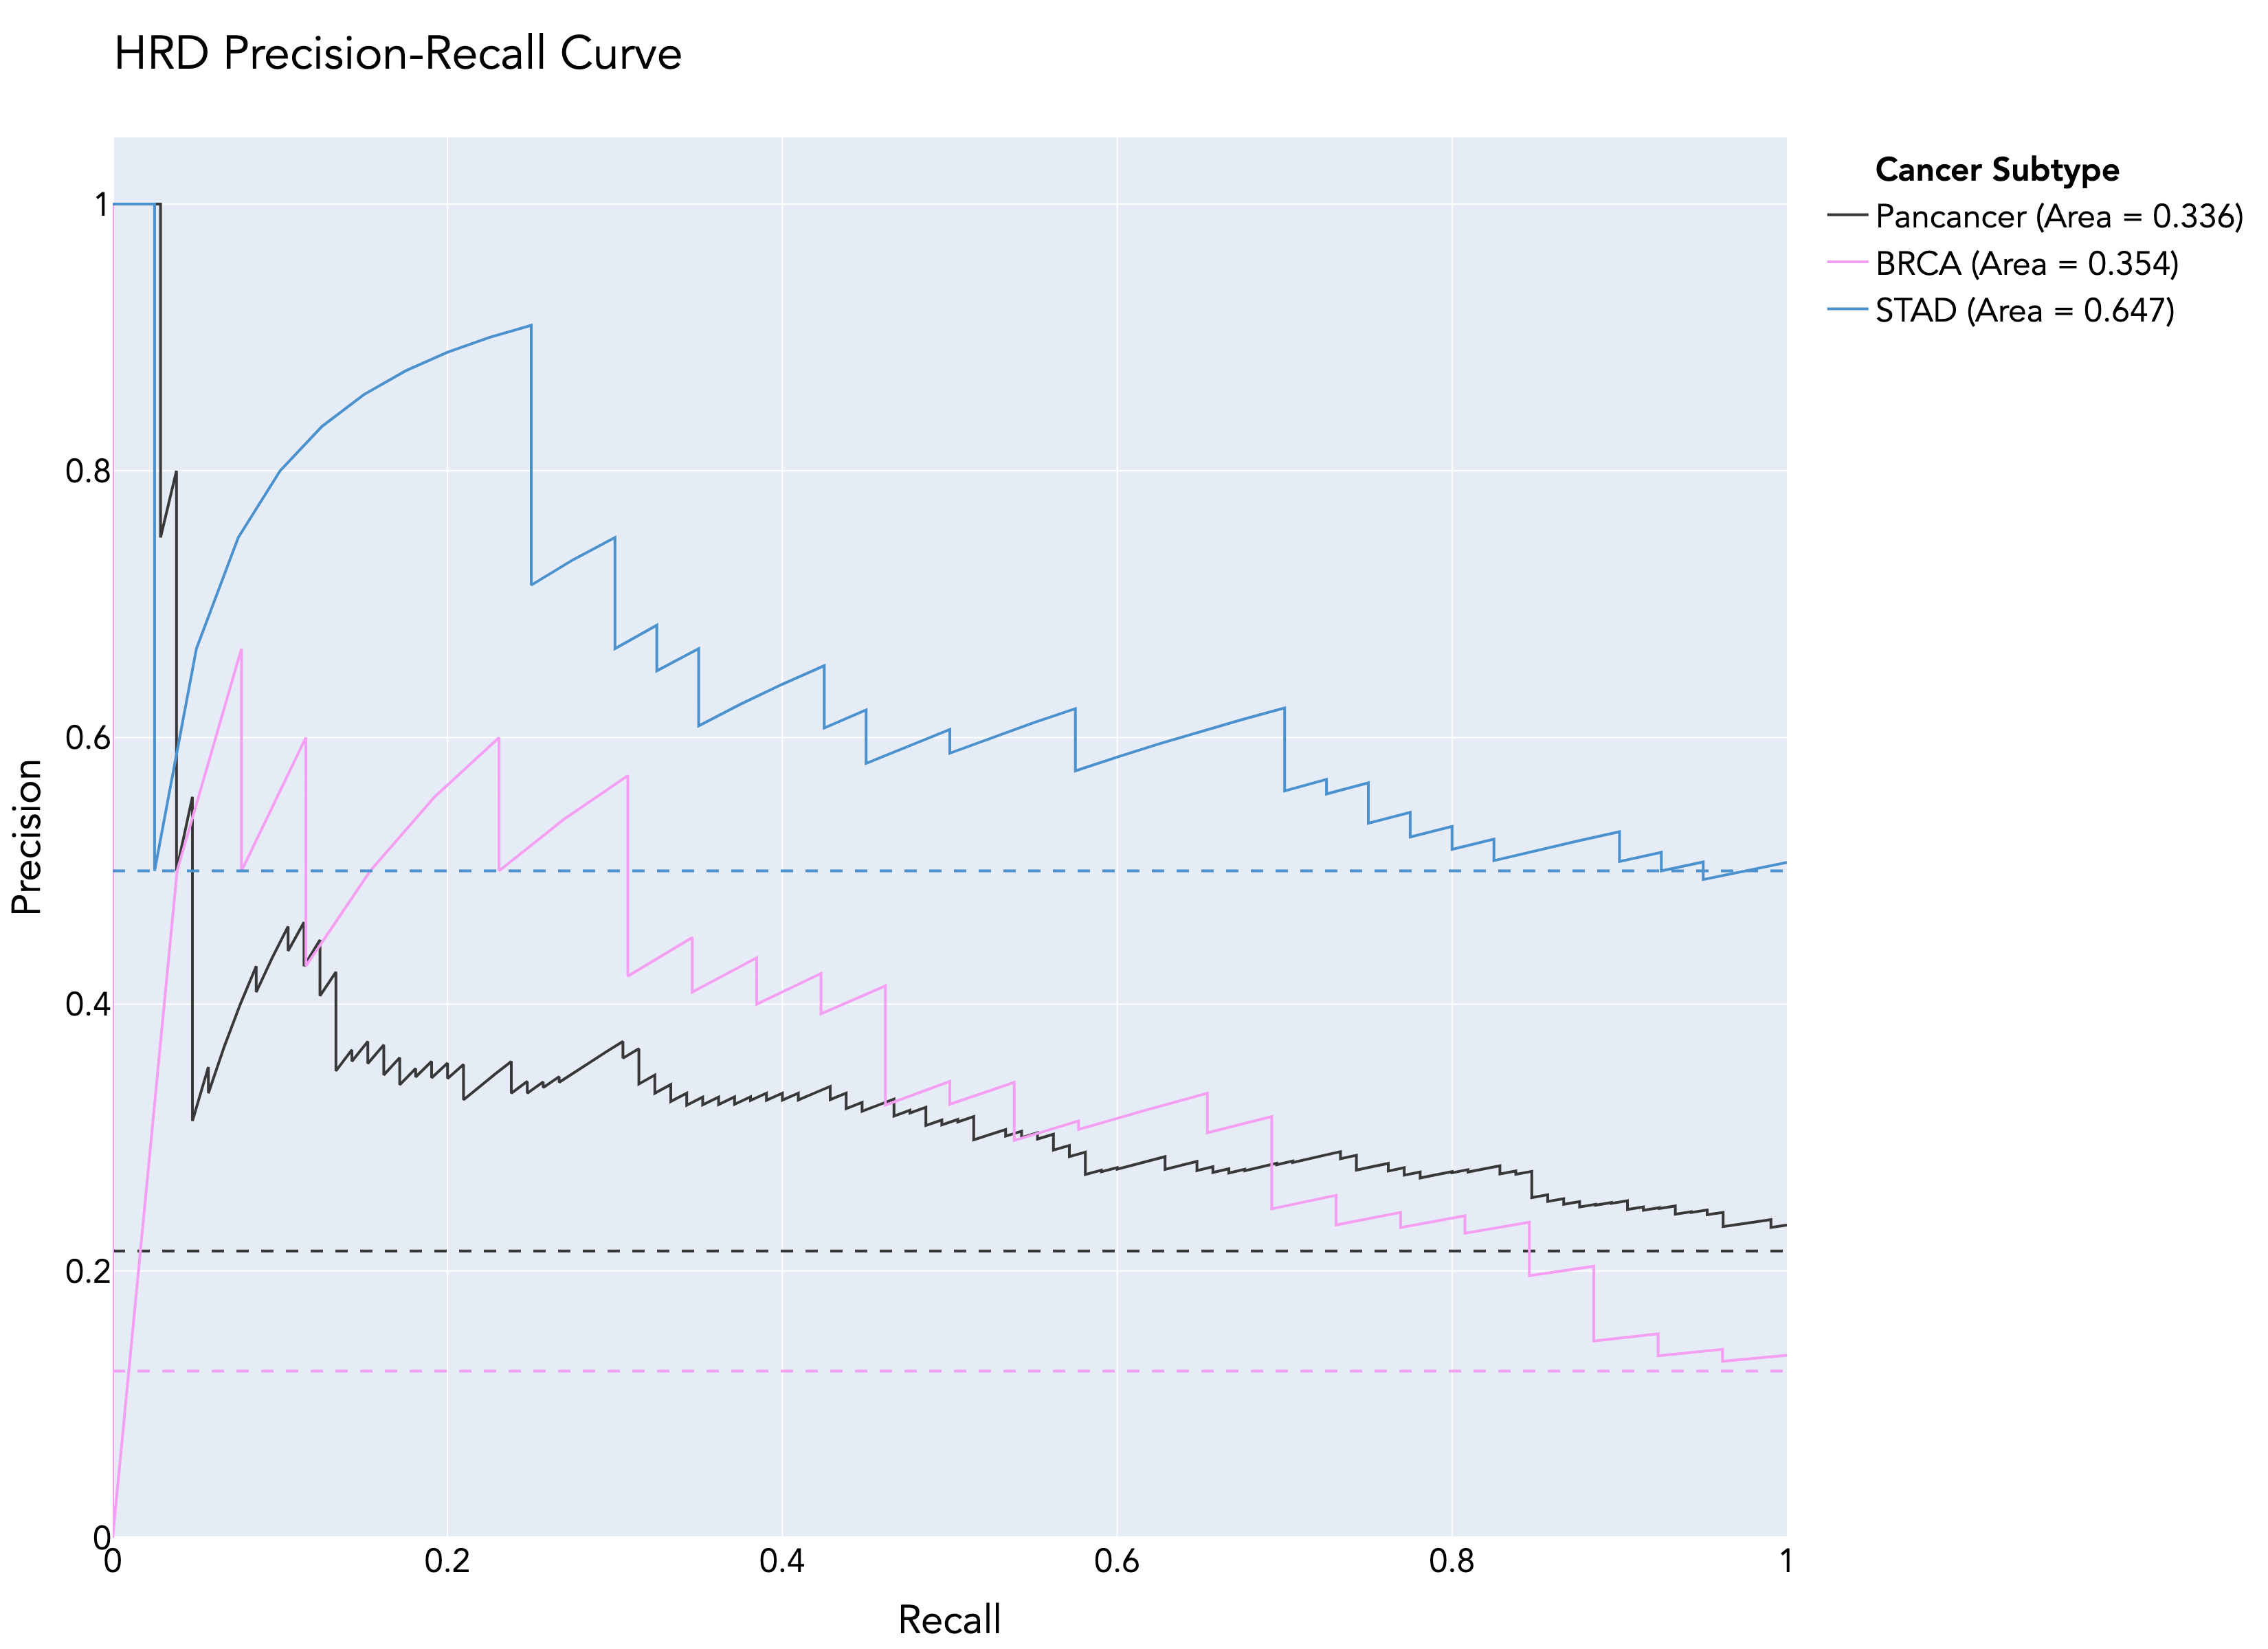

In [42]:
# Plot PRC
dummy_trace = go.Scatter(
    x=[None], y=[None],
    name='<b>Cancer Subtype</b>',
    opacity = 0,
    line={'color': 'rgba(0, 0, 0, 0)'}
)
data = [dummy_trace]

# Pancancer
prc_auc = auc(pancancer_recall, pancancer_precision)
trace = go.Scatter(
    x=pancancer_recall,
    y=pancancer_precision,
    mode='lines',
    line=dict(color='#393838'),
    opacity=1.0,
    name='Pancancer (Area = %0.3f)' % prc_auc
)
data.append(trace)

# Plot pancancer % positive 
trace = go.Scatter(
    x=np.array([0, 1]),
    y=np.array([pct_positive['Pancancer'], pct_positive['Pancancer']]),
    mode='lines',
    line=dict(color='#393838', dash='dash'),
    opacity=1.0,
    showlegend=False
)
data.append(trace)
    
# BRCA
prc_auc = auc(brca_recall, brca_precision)
trace = go.Scatter(
    x=brca_recall,
    y=brca_precision,
    mode='lines',
    line=dict(color=colors['BRCA']),
    opacity=1.0,
    name='BRCA (Area = %0.3f)' % prc_auc
)
data.append(trace)  

# Plot BRCA % positive 
trace = go.Scatter(
    x=np.array([0, 1]),
    y=np.array([pct_positive['BRCA'], pct_positive['BRCA']]),
    mode='lines',
    line=dict(color=colors['BRCA'], dash='dash'),
    opacity=1.0,
    showlegend=False
)
data.append(trace)

# # LUAD
# prc_auc = auc(luad_recall, luad_precision)
# trace = go.Scatter(
#     x=luad_recall,
#     y=luad_precision,
#     mode='lines',
#     line=dict(color='#054907'),
#     opacity=1.0,
#     name='LUAD (Area = %0.3f)' % prc_auc
# )
# data.append(trace)

# # Plot LUAD % positive 
# trace = go.Scatter(
#     x=np.array([0, 1]),
#     y=np.array([pct_positive['LUAD'], pct_positive['LUAD']]),
#     mode='lines',
#     line=dict(color='#054907', dash='dash'),
#     opacity=1.0,
#     showlegend=False
# )
# data.append(trace)


# # LUSC
# prc_auc = auc(lusc_recall, lusc_precision)
# # plt.plot(lusc_fpr, lusc_tpr, color='xkcd:orange', lw=2, label='LUSC (Area = %0.3f)' % roc_auc)
# trace = go.Scatter(
#     x=lusc_recall,
#     y=lusc_precision,
#     mode='lines',
#     line=dict(color='#f97306'),
#     opacity=1.0,
#     name='LUSC (Area = %0.3f)' % prc_auc
# )
# data.append(trace)

# # Plot LUSC % positive 
# trace = go.Scatter(
#     x=np.array([0, 1]),
#     y=np.array([pct_positive['LUSC'], pct_positive['LUSC']]),
#     mode='lines',
#     line=dict(color='#f97306', dash='dash'),
#     opacity=1.0,
#     showlegend=False
# )
# data.append(trace)

# STAD
prc_auc = auc(stad_recall, stad_precision)
trace = go.Scatter(
    x=stad_recall,
    y=stad_precision,
    mode='lines',
    line=dict(color=colors['STAD']),
    opacity=1.0,
    name='STAD (Area = %0.3f)' % prc_auc
)
data.append(trace)

# Plot STAD % positive 
trace = go.Scatter(
    x=np.array([0, 1]),
    y=np.array([pct_positive['STAD'], pct_positive['STAD']]),
    mode='lines',
    line=dict(color=colors['STAD'], dash='dash'),
    opacity=1.0,
    showlegend=False
)
data.append(trace)
    
fig = go.Figure(data=data)

fig.update_layout(
    title='HRD Precision-Recall Curve',
    xaxis_title="Recall",
    yaxis_title="Precision",
    font=dict(
        family="Avenir",
        size=24,
        color="black"
    )
)

fig.update_traces(marker_line_width=2, marker_size=12)
fig.update_xaxes(range=[0.0, 1.0])
fig.update_yaxes(range=[0.0, 1.05])

img_bytes = fig.to_image(format="png", width=1650, height=1200, scale=2)
Image(img_bytes)